# Implement Logistic Regression from scratch

In this assignment, you will implement Logistic Regression with L1 regularization from scratch and predict the labels of the test data. You will then verify the correctness of the your implementation using multiple "grader" functions/cells (provided by us) which will match your implmentation.

The grader functions would help you validate the correctness of your code. 

Please submit the final Colab notebook in the classroom ONLY after you have verified your code using the grader functions/cells.


**NOTE: DO NOT change the "grader" functions or code snippets written by us.Please add your code in the suggested locations.**

Ethics Code:
1. You are welcome to read up online resources to implement the code. 
2. You can also discuss with your classmates on the implmentation over Slack.
3. But, the code you write and submit should be yours ONLY. Your code will be compared against other stduents' code and online code snippets to check for plagiarism. If your code is found to be plagiarised, you will be awarded zero-marks for all assignments, which have a 10% weightage in the final marks for this course.

In [1]:
# Loading data from csv file
import pandas as pd
data_path = 'logistic_regression_assignment_data.csv'

df = pd.read_csv(data_path)
df

,category,text
0,0,worldcom boss left books alone former worldc...
1,1,tigers wary of farrell gamble leicester say ...
2,1,yeading face newcastle in fa cup premiership s...
3,1,henman hopes ended in dubai third seed tim hen...
4,1,wilkinson fit to face edinburgh england captai...
...,...,...
1012,0,wall street cool to ebay s profit shares in on...
1013,0,ban on forced retirement under 65 employers wi...
1014,1,time to get tough on friendlies for an intern...
1015,0,christmas shoppers flock to tills shops all ov...


#### **Note:** Here class-0 is of category "business" and class-1 is of category "sport"

In [2]:
# Data Overiview
df['category'].value_counts()

1    509
0    508
Name: category, dtype: int64

### Creating Train and Test Datasets


In [3]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split

text = df['text']
category = df['category']
train_text, test_text, train_category, test_category = train_test_split(text, category, random_state=42, stratify=category, test_size=0.01)

print("Shape of Train_Text = ", train_text.shape)
print("Shape of Test_Text = ", test_text.shape)
print("Shape of Train_Category = ", train_category.shape)
print("Shape of Train_Category = ", test_category.shape)

Shape of Train_Text =  (1006,)
Shape of Test_Text =  (11,)
Shape of Train_Category =  (1006,)
Shape of Train_Category =  (11,)


## Custom Implementation

### Instructions:

  1. Read in the train_data.
  2. Vectorize train_data and test_data using sklearns built in tfidf vectorizer.
  3. Ignore unigrams and make use of both **bigrams & trigrams** and also limit the **max features** to **2000** and **minimum document frequency** to **10**.
  4. After the tfidf vectors are generated as mentioned above, next task is to column standardize your data.
  5. We want you to write in comments in your code, the reason you think for standardizing the data in the above step.
  6. You can use sklearn StandardScaler to column standardize your data.
  7. Write a function to initialise your weights & bias. And then run its corresponding grader function.
  8. Write a custom function to calculate sigmoid of a value. And then run its corresponding grader function to cross check your implementation of sigmoid function.
  9. Write a custom function to compute the total loss as the sum of log loss and l1 regularization loss based on true labels and predicted labels and weights. And you can crosscheck your implementation with its corresponding grader.
  10. Write a function to compute gradients for your weights and bias terms, which you have to make use of in updating your weights and bias while training your model.
  11. Implement a custom train function of logistic regression, wherein you take in the following inputs:
        * **X_train** which will be your vectorized text data
        * **y_train** which are the labels for your train data
        * **alpha** = 0.0001 which is the regularization factor (λ) 
        * **eta0** = 0.0001 which will be the learning rate   
        * **tolerance** = 0.001
        
  12. In the custom train function you should make use of a custom SGD function to update the weights and bias terms for **each** of your inputs. 
  13. The custom SGD implemented in the above train function for updating the weights and bias terms should run for many epochs until the difference in loss between two consecutive epochs is less than tolerance.

  14. Here one epoch means a complete iteration of your entire train data.
  15. Your train function should return the follwing:
        * the number of epochs it took to complete the training
        * train loss for all epochs
        * the values for final weights and bias terms.
        
  16. Now run the grader function to check whether the weights and bias obtained from your custom implementation are close enough to that of sklearns implementation.
  17. Next write a custom predict function which takes in as input the weights and bias values that you computed in your train function, and also takes in the test standardized data as input to predict its labels.
  18. Now run the grader function to check the accuracy of your predictions.





### Import necessary libraries

In [4]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import matplotlib.pyplot as plt
import math

### 1. Vectorize train data and test data using sklearn tf-idf in the below cell

In [5]:
'''vectorize train and test data using TF-IDF and store them in train_vectors and test_vectors respectively'''
vectorizer = TfidfVectorizer(ngram_range=(2,3),max_features=2000,min_df=10)
train_vectors = vectorizer.fit_transform(train_text)
test_vectors = vectorizer.transform(test_text)
train_vectors.shape, test_vectors.shape

((1006, 2000), (11, 2000))

### 2. Column standardize the train and test data

What is the reasoning for column standardizing the data?

Answer: Different features could be in different scales, it is hence important from performance pov to perform column standardize the data so that features at different scales do not impact the logistic regression model(which is distance based)

In [6]:
'''column standardize the train and test data and store them in train_vectors_stand and test_vectors_stand'''
scaler = StandardScaler( )
train_vectors_stand = scaler.fit_transform(train_vectors.todense())
test_vectors_stand = scaler.transform(test_vectors.todense())
train_vectors_stand.shape, test_vectors_stand.shape

((1006, 2000), (11, 2000))

### 3. Custom function to intialise your weights and bias terms

In [7]:
def initialize_weights_bias(dim):
    ''' In this function, we will initialize our weights and bias terms'''

    # Initialize the weights to zeros array of (dim) dimensions. Here dim will be the number of features of your tfidf vectorizer output.
    # You can initialize the weight terms with zeros.
    # Initialize bias term to zero
    # Write your code below.
    
    w = np.zeros((dim))
    b = 0
    return w,b

### Grader Function - 1

In [8]:
# Grader function to check the initialization of your weights and bias terms.

def grader_weights_bias(w,b):
  assert((len(w)==2000) and b==0)
  return True

dim = 2000
w,b = initialize_weights_bias(dim)
grader_1 = grader_weights_bias(w,b)
print("Grader_1 Status : ", grader_1)

Grader_1 Status :  True


### 4. Custom function to calculate sigmoid of a value

In [9]:
def custom_sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    
    # Compute sigmoid(z) and return its value.
    # Write your code below.
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

### Grader Function - 2

In [10]:
# Grader function to check the implementaiton of sigmoid function

def grader_sigmoid(z):
  val = custom_sigmoid(z)
  assert(val==0.8807970779778823)
  return True

grader_2 = grader_sigmoid(2)
print("Grader_2 Status : ", grader_2)

Grader_2 Status :  True


### 5.  Custom function to compute loss function

$logloss = -1*\frac{1}{n}\Sigma_{for each Y_{true},Y_{pred}}(Y_{true}log10(Y_{pred})+(1-Y_{true})log10(1-Y_{pred}))$ 

$L1 loss = \Sigma_{for each w}(|w|)$

$total loss = logloss + alpha*L1loss$<br>
Where alphas is the regularization parameter

In [11]:
def logloss(y_true,y_pred):
    log_loss = ((-1) * ((y_true * np.log10(y_pred)) + (1-y_true) * np.log10(1-y_pred)).sum() ) / len(y_true)

    return log_loss

In [12]:
def custom_loss(y_true, y_pred, alpha, w):
    '''In this function, we will compute total loss which is [(logloss) + (alpha * L1regularization loss)] '''
    
    # Write your code below.
    y_true = np.array(y_true)
    y_pred= np.array(y_pred)
    log_loss = logloss(y_true,y_pred)
    l1_loss = np.sum(abs(w))
    total_loss = log_loss + ( alpha * l1_loss )
    return total_loss

### Grader Function - 3

In [13]:
# Grader function to check the implementaiton of logloss

def grader_loss():
  true_values = [1,1,0,1,0]
  pred_values = [0.9,0.8,0.1,0.8,0.2]
  w= np.array([0.1]*10)
  alpha= 0.0001
  loss = custom_loss(true_values, pred_values,alpha,w)
  assert(loss==0.07644900402910389+0.0001*10*0.1)
  return True


grader_3 = grader_loss()
print("Grader_3 Status : ", grader_3)

Grader_3 Status :  True


### 6. Custom function to updated weights and bias terms

Use the below formula to compute gradient of your weight and bias terms <br>
Loss term Li for a single example is given as below: 
<br>
<br>

$Li= -(Y_{i}log10(𝝈_{i})-(1-Y_{i})log10(1-𝝈_{i}) + \frac{alpha}{N}(sum(|w|))
$ <br>
<br>
$Where: 𝝈_{i} = σ(w^{T} x_i+b) $ <br>
<br>
And: L1 regularization = $\frac{alpha}{N}(sum(|w|)) $ <br>
Alpha: It is the Regularization parameter <br>
N : number of training examples<br>
σ : sigmoid function <br>
<br>
<br>
<br>
$dLi/dw= -Y_{i}x_{i}(1-𝝈_{i}) + (1-Y_{i})x_{i}𝝈_{i} + \frac{alpha}{N} \frac{w + (1e-5)}{|w + (1e-5)|}  $<br>
NOTE THAT: 1e-5 used in numerator and denominator to avoid division error <br>

$dLi/db= -Y_{i}(1-𝝈_{i}) + (1-Y_{i})𝝈_{i}$<br>
<br>
<br>
Hence,<br>
$dLi/dw= dw = (𝝈_{i} -Y_{i})x_{i} + \frac{alpha}{N}\frac{w + (1e-5)}{|w + (1e-5)|} $<br>
1e-5 used in numerator and denominator to avoid division error <br>
$dLi/db =  db = 𝝈_{i}-Y_{i}$
<br>
<br>
!!NOTE: USE NEGATIVE GRADIENT WHILE UPDATING

### 6a. Custom function to compute Gradient of loss function wrt weights:

In [14]:
def gradient_dw(x, y, w, b, alpha, N):
    '''In this function, we will compute the gardient w.r.t. w '''
    
    # Write your code below.
    dw= (x*(custom_sigmoid(np.dot(w,x) + b) - y)) + ((alpha/N)*((w+1e-5)/abs(w+1e-5)))
    return dw

### 6b.  Custom function to compute Gradient of loss function wrt bias term:

In [15]:
def gradient_db(x, y, w, b):
    '''In this function, we will compute the gardient w.r.t. b '''
    
    # Write your code below.
    db = custom_sigmoid(np.dot(w,x) + b) - y
    return db

### 6c. Custom function to train logistic regression model

$w^{(t+1)}← w^{(t)}- eta0*(dw^{(t)}) $<br>
$b^{(t+1)}←b^{(t)} - eta0*(db^{(t)}) $

In [16]:
def custom_train(X_train, y_train,alpha, eta0,tolerance):
  """
  In this function we will compute optimal values for weights and bias terms on
  the train data. 

  Here eta0 is the learning rate and alpha is the regularization term.
  """
  train_loss=[]
  # Implement the code as follows:
  # 1. Initalize the weights (call the initialize_weights(X_train[0]) function)
  # 2. Repeat For many epochs until condition "e"  fails
          # a) for every data point(X_train,y_train)
                # compute gradient w.r.to w (call the gradient_dw() function)
                # compute gradient w.r.to b (call the gradient_db() function)
                # update w, b using the above eqns
          # b) predict the output of x_train[for all data points in X_train] using w,b
          # c) compute the loss between predicted and actual values (call the loss function)
          # d) store all the train loss values in a list
          # e) Compare previous loss and current loss, if the difference between loss is not more than or equal to the tolerance, stop the process and return w,b
  # 3. Return the values of weights, bias, train_loss and num_epochs 
  #initializing the weights and bias
  w,b = initialize_weights_bias(X_train.shape[1])
  N = len(X_train)
  for epoch in range(1,5000):
    for i in range(N):
      x = X_train[i]
      y = y_train[i]
      dw = gradient_dw(x, y, w, b, alpha, N)
      db = gradient_db(x,y,w,b)
      w = w - (eta0 * dw)
      b = b - (eta0 * db)
    train_pred = []
    for i in X_train:
      z = np.dot(w, i)
      y_pred = custom_sigmoid(z+b)
      train_pred.append(y_pred)
    y_pred_arr = np.array(train_pred)
    train_loss.append((custom_loss(y_train, y_pred_arr, alpha, w)))
    if epoch > 1:
      if ((train_loss[epoch-2]-train_loss[epoch-1])>=tolerance) == False:
        break
  return w,b,train_loss,epoch

### Grader Function - 4

In [17]:
def grader_weights_bias():
  # fitting sklearn SGD classifier
  clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l1', tol=1e-3, learning_rate='constant')
  clf.fit(train_vectors_stand,train_category.values)
  model_coef= clf.coef_[0]
  # fitting custom train with same learning rate, regularization and tolerance as of sklearn
  w,b,_,epoch = custom_train(train_vectors_stand, train_category.values, 0.0001,0.0001,0.001)

  # checking whether the weights and bias returned by both the implementations are closer
  
  assert(not (b-clf.intercept_>0.02)==True)
  assert((not (w-model_coef>0.10).any())==True)
  
  return True

grader_4 = grader_weights_bias()
print("Grader_4 Status : ", grader_4)

Grader_4 Status :  True


### 7. Plot the train loss with x as epoch number and y as train loss

18
18


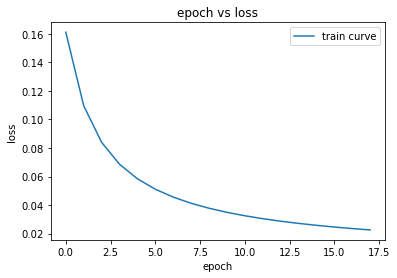

In [18]:
# plotting graph for epoch vs loss for train and test data

w,b,train_loss,epochs = custom_train(train_vectors_stand, train_category.values, 0.0001,0.0001,0.001)
plt.plot(range(epochs),train_loss,label='train curve')
plt.title('epoch vs loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 8. Custom function to make predictions using logistic regression model

In [25]:
def predict(w,b, X):
    predictions = [ 1 if custom_sigmoid(np.dot(w,X[i])+b) > 0.5 else 0  for i in range(len(X)) ]
    return np.array(predictions)

### Grader Function - 5

In [26]:
def grader_predict():
  ''' grader to check the test accuracy'''
  w,b,_,_ = custom_train(train_vectors_stand, train_category.values, 0.0001,0.0001,0.001)
  test_preds = predict(w,b,test_vectors_stand)
  test_accuracy = (np.sum(test_category==test_preds)/len(test_preds))*100
  if(test_accuracy>=90):
    print("Success!")
  else:
    print("Failed! \n Test accuracy = ", test_accuracy)
  return
  
grader_predict()

Success!
